# Kriging POD

In [1]:
# import relevant module
import openturns as ot
import otpod
# enable display figure in notebook
%matplotlib inline

## Generate data

In [2]:
inputSample = ot.NumericalSample(
    [[4.59626812e+00, 7.46143339e-02, 1.02231538e+00, 8.60042277e+01],
    [4.14315790e+00, 4.20801346e-02, 1.05874908e+00, 2.65757364e+01],
    [4.76735111e+00, 3.72414824e-02, 1.05730385e+00, 5.76058433e+01],
    [4.82811977e+00, 2.49997658e-02, 1.06954641e+00, 2.54461380e+01],
    [4.48961094e+00, 3.74562922e-02, 1.04943946e+00, 6.19483646e+00],
    [5.05605334e+00, 4.87599783e-02, 1.06520409e+00, 3.39024904e+00],
    [5.69679328e+00, 7.74915877e-02, 1.04099514e+00, 6.50990466e+01],
    [5.10193991e+00, 4.35520544e-02, 1.02502536e+00, 5.51492592e+01],
    [4.04791970e+00, 2.38565932e-02, 1.01906882e+00, 2.07875350e+01],
    [4.66238956e+00, 5.49901237e-02, 1.02427200e+00, 1.45661275e+01],
    [4.86634219e+00, 6.04693570e-02, 1.08199374e+00, 1.05104730e+00],
    [4.13519347e+00, 4.45225831e-02, 1.01900124e+00, 5.10117047e+01],
    [4.92541940e+00, 7.87692335e-02, 9.91868726e-01, 8.32302238e+01],
    [4.70722074e+00, 6.51799251e-02, 1.10608515e+00, 3.30181002e+01],
    [4.29040932e+00, 1.75426222e-02, 9.75678838e-01, 2.28186756e+01],
    [4.89291400e+00, 2.34997929e-02, 1.07669835e+00, 5.38926138e+01],
    [4.44653744e+00, 7.63175936e-02, 1.06979154e+00, 5.19109415e+01],
    [3.99977452e+00, 5.80430585e-02, 1.01850716e+00, 7.61988190e+01],
    [3.95491570e+00, 1.09302814e-02, 1.03687664e+00, 6.09981789e+01],
    [5.16424368e+00, 2.69026464e-02, 1.06673711e+00, 2.88708887e+01],
    [5.30491620e+00, 4.53802273e-02, 1.06254792e+00, 3.03856837e+01],
    [4.92809155e+00, 1.20616369e-02, 1.00700410e+00, 7.02512744e+00],
    [4.68373805e+00, 6.26028935e-02, 1.05152117e+00, 4.81271603e+01],
    [5.32381954e+00, 4.33013582e-02, 9.90522007e-01, 6.56015973e+01],
    [4.35455857e+00, 1.23814619e-02, 1.01810539e+00, 1.10769534e+01]])

signals = ot.NumericalSample(
    [[ 37.305445], [ 35.466919], [ 43.187991], [ 45.305165], [ 40.121222], [ 44.609524],
     [ 45.14552 ], [ 44.80595 ], [ 35.414039], [ 39.851778], [ 42.046049], [ 34.73469 ],
     [ 39.339349], [ 40.384559], [ 38.718623], [ 46.189709], [ 36.155737], [ 31.768369],
     [ 35.384313], [ 47.914584], [ 46.758537], [ 46.564428], [ 39.698493], [ 45.636588],
     [ 40.643948]])

## Build POD with Kriging model

In [3]:
# signal detection threshold
detection = 38.
# The POD with censored data actually builds a POD only on filtered data.
# A warning is diplayed in this case.
POD = otpod.KrigingPOD(inputSample, signals, detection,
                       noiseThres=35., saturationThres=45.)

### User-defined defect sizes

The user-defined defect sizes must range between the minimum and
maximum of the defect values after filtering. An error is raised if 
it is not the case. The available range is then returned to the user.

In [4]:
# Default defect sizes
print('Default defect sizes : ')
print(POD.getDefectSizes())

# Wrong range
try:
    POD.setDefectSizes([3.2, 3.6, 4.5, 5.5])
except ValueError as e:
    print('Range of the defect sizes is too large, it returns a value error : ')
    print(e)

Default defect sizes : 
[ 3.9549157   4.0152854   4.07565509  4.13602479  4.19639448  4.25676418
  4.31713387  4.37750357  4.43787326  4.49824296  4.55861265  4.61898235
  4.67935204  4.73972174  4.80009143  4.86046113  4.92083082  4.98120052
  5.04157021  5.10193991]
Range of the defect sizes is too large, it returns a value error : 
Defect sizes must range between 3.9550 and 5.1019.


In [5]:
# Good range
POD.setDefectSizes([4., 4.3, 4.6, 4.9, 5.1])
print('User-defined defect size : ')
print(POD.getDefectSizes())

User-defined defect size : 
[ 4.   4.3  4.6  4.9  5.1]


### Running the Kriging based POD

The computing time can be reduced by setting the simulation size attribute to 
another value. However the confidence interval is less accurate.

The sampling size is the number of the samples used to compute the POD
with the Monte Carlo simulation for each defect sizes.

A progress is displayed, which can be disabled with the method *setVerbose*.

In [6]:
POD = otpod.KrigingPOD(inputSample, signals, detection)
# we can change the number of initial random search for the best starting point
# of the TNC algorithm which optimizes the covariance model parameters
POD.setInitialStartSize(500) # default is 1000
# we can change the sample size of the Monte Carlo simulation
POD.setSamplingSize(2000) # default is 5000
# we can also change the size of the simulation to compute the confidence interval
POD.setSimulationSize(500) # default is 1000
%time POD.run()

Start optimizing covariance model parameters...
Kriging optimizer completed
kriging validation Q2 (>0.9): 1.0000
Computing POD per defect: [==================================================] 100.00% Done
CPU times: user 37.7 s, sys: 13.2 s, total: 50.9 s
Wall time: 52.3 s


## Compute detection size

In [7]:
# Detection size at probability level 0.9
# and confidence level 0.95
print(POD.computeDetectionSize(0.9, 0.95))

# probability level 0.95 with confidence level 0.99
print(POD.computeDetectionSize(0.95, 0.99))

[a90 : 4.62318, a90/95 : 4.63983]
[a95 : 4.66733, a95/99 : 4.6837]


## get POD NumericalMathFunction

In [8]:
# get the POD model
PODmodel = POD.getPODModel()
# get the POD model at the given confidence level
PODmodelCl95 = POD.getPODCLModel(0.95)

# compute the probability of detection for a given defect value
print('POD : {:0.3f}'.format(PODmodel([4.2])[0]))
print('POD at level 0.95 : {:0.3f}'.format(PODmodelCl95([4.2])[0]))

POD : 0.148
POD at level 0.95 : 0.126


## Compute the Q2
Enable to check the quality of the model.

In [9]:
print('Q2 : {:0.4f}'.format(POD.getQ2()))

Q2 : 1.0000


### Draw the validation graph
The predictions are the one computed by leave one out.

/home/dumas/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


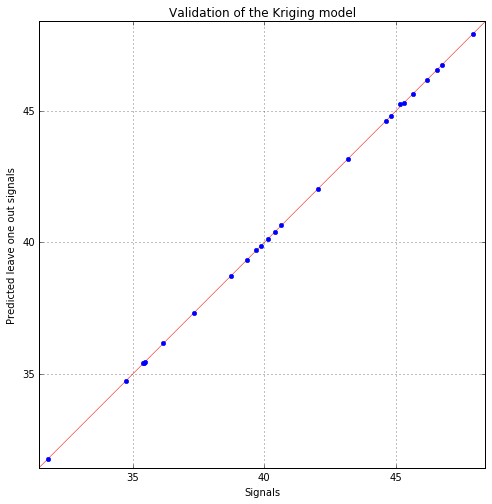

In [10]:
fig, ax = POD.drawValidationGraph()
fig.show()

## Show POD graphs
### Mean POD and POD at confidence level with the detection size for a given probability level

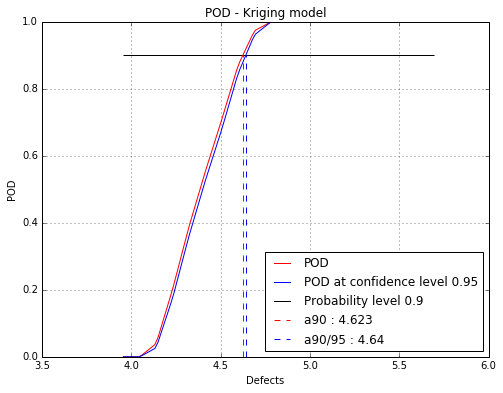

In [11]:
fig, ax = POD.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95,
                      name='figure/PODKriging.png')
# The figure is saved in PODPolyChaos.png
fig.show()

## Advanced user mode

The user can defined one or both parameters of the kriging algorithm : 
- the basis
- the covariance model

The user can also defined the input parameter distribution it is known.

The user can set the KrigingResult object if it built from other data.

In [12]:
# new POD study
PODnew = otpod.KrigingPOD(inputSample, signals, detection)

In [13]:
# set the basis constant
basis = ot.ConstantBasisFactory(4).build()
PODnew.setBasis(basis)

In [14]:
# set the covariance Model as an absolute exponential model
covColl = ot.CovarianceModelCollection(4)
for i in xrange(4):
    covColl[i]  = ot.AbsoluteExponential([1], [1.])
covarianceModel = ot.ProductCovarianceModel(covColl)

PODnew.setCovarianceModel(covarianceModel)

In [15]:
PODnew.run()

Start optimizing covariance model parameters...
Kriging optimizer completed
kriging validation Q2 (>0.9): 0.9660
Computing POD per defect: [==================================================] 100.00% Done


In [16]:
print(PODnew.computeDetectionSize(0.9, 0.95))
print('Q2 : {:0.4f}'.format(POD.getQ2()))

[a90 : 4.63513, a90/95 : 4.77085]
Q2 : 1.0000


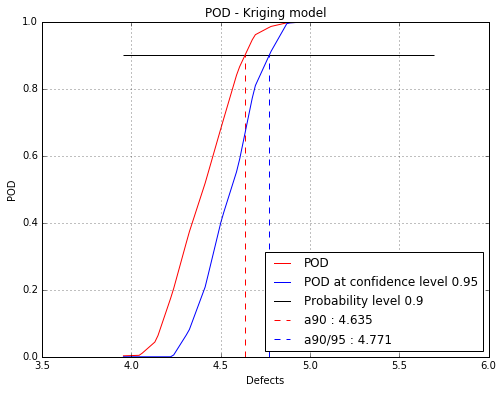

In [17]:
fig, ax = PODnew.drawPOD(probabilityLevel=0.9, confidenceLevel=0.95)
fig.show()

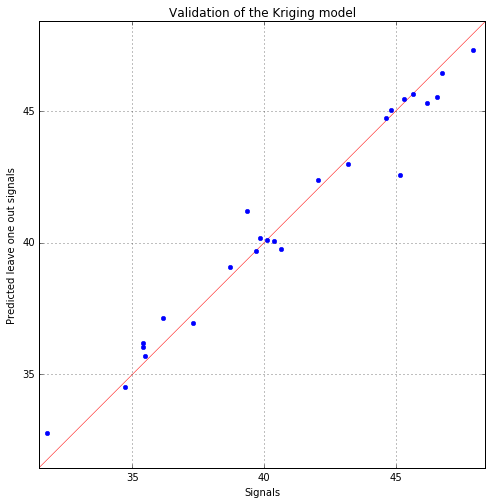

In [18]:
fig, ax = PODnew.drawValidationGraph()
fig.show()